# Web Scraping from Reddit
r/CryptoCurrency, Offical Daily Discussion December 19, 2021

Kritik Mirg

In [1]:
import pandas as pd
import re
import praw

### Extracting Data from Reddit

In [2]:
#Authenticating with Reddit
reddit = praw.Reddit(client_id='',
                             client_secret='',
                             password='',
                             user_agent='',
                             username='', 
                     check_for_async=False)

In [3]:
#The URL of the post where the script will extract the comments
url = 'https://www.reddit.com/r/CryptoCurrency/comments/rjk0k8/daily_discussion_december_19_2021_gmt0/'

submission = reddit.submission(url=url)

co = {
    "comm":[]
}

In [4]:
#Iterating through the comments and adding to DataFrame
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    co['comm'].append(comment.body)
    
    
df = pd.DataFrame(co)

In [5]:
df.head(10)

,comm
0,* For help finding the latest Skeptics Discuss...
1,Anyone still bullish on CRO?
2,"Come on Bitcoin, you can touch 50K again. At l..."
3,[removed]
4,If LINK can get back to ATH I will have the cl...
5,Even ADA is up a little\n\n![gif](giphy|3ohuAA...
6,Wow… \n\nDOT is out of the top 10… \n\nDamn😔
7,Another crypto triva question for a gold award...
8,$47k is acceptable now? Get the fuck back in t...
9,You know you’ve got a crypto addiction when yo...


### Transforming Data

In [6]:
#Function to remove emojis 
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [7]:
#Removing all emojis from the comments column
df['comm']=df['comm'].apply(lambda x:remove_emoji(str(x)))

In [8]:
#Removing all non english/numeric characters from the comments column, using regular expression (Regex)
df['comm']=df['comm'].str.replace('[^A-Za-z0-9  ]','',regex=True)

In [9]:
#Converting all characters to lower case
df['comm']=df['comm'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
#Creating column based on number of words in each comment
df['word_count'] = df['comm'].apply(lambda x: len(str(x).split(" ")))

In [12]:
df.head(10)

,comm,word_count
0,for help finding the latest skeptics discussio...,49
1,anyone still bullish on cro,5
2,come on bitcoin you can touch 50k again at lea...,12
3,removed,1
4,if link can get back to ath i will have the cl...,15
5,even ada is up a littlegifgiphy3ohuaaaivicves4psc,6
6,wow dot is out of the top 10 damn,9
7,another crypto triva question for a gold award...,33
8,47k is acceptable now get the fuck back in the...,13
9,you know youve got a crypto addiction when you...,20


### NLP Text Preprocessing 

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from textblob import TextBlob

In [17]:
#Correcting any spelling mistakes in comments
df['comm']=df['comm'].apply(lambda x: str(TextBlob(x).correct()))

In [18]:
#Lemmatization of text to reduce text density
lemmatizer = WordNetLemmatizer()
df['comm']=df['comm'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [44]:
#Removing all stop words from comments, including some manually added stop words
stop = stopwords.words('english')
new_stopwords = ["bro","relax","see",'new','get','let','lol','also','lmao','isnt','ive','ill','dont','etc','got']
stop.extend(new_stopwords)

In [45]:
#Creating new column displaying count of all stop words in comment
df['stopwords'] = df['comm'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [46]:
df.head(10)

,comm,word_count,stopwords,sentiment
0,for help finding the latest skeptic discussion...,49,20,0.366667
1,anyone still bluish on cry,5,1,0.000000
2,come on bitcoin you can touch ask again at lea...,12,6,-0.300000
3,removed,1,0,0.000000
4,if link can get back to at i will have the cli...,15,11,0.000000
5,even add is up a littlegifgiphy3ohuaaaivicves4psc,6,3,0.000000
6,now dot is out of the top 10 damn,9,5,0.500000
7,another crept tried question for a gold award ...,33,16,0.000000
8,ask is acceptable now get the fuck back in the...,13,7,-0.200000
9,you know you got a crept addition when your cr...,20,11,0.000000


### Loading into Text File

In [47]:
#Concatenating all comments into a text file
final = ' '.join(df['comm'])
final_txt = open('/CryptoCurrency_Comments.txt','w')
final_txt.writelines(final)
final_txt.close()

### Analysis

In [48]:
#Performing sentiment analysis on the comments 
#Sentiment Analysis is used decipher the mood and emotions of comments
df['sentiment']=df['comm'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment'].describe()

count    2283.000000
mean        0.086213
std         0.247529
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: sentiment, dtype: float64

In [49]:
#Checking to see number of positive comments
df_positive=df[df['sentiment']>=0.00]
df_positive.shape

(1914, 4)

Used text file of all comments to create a word cloud to do some visual analysis.

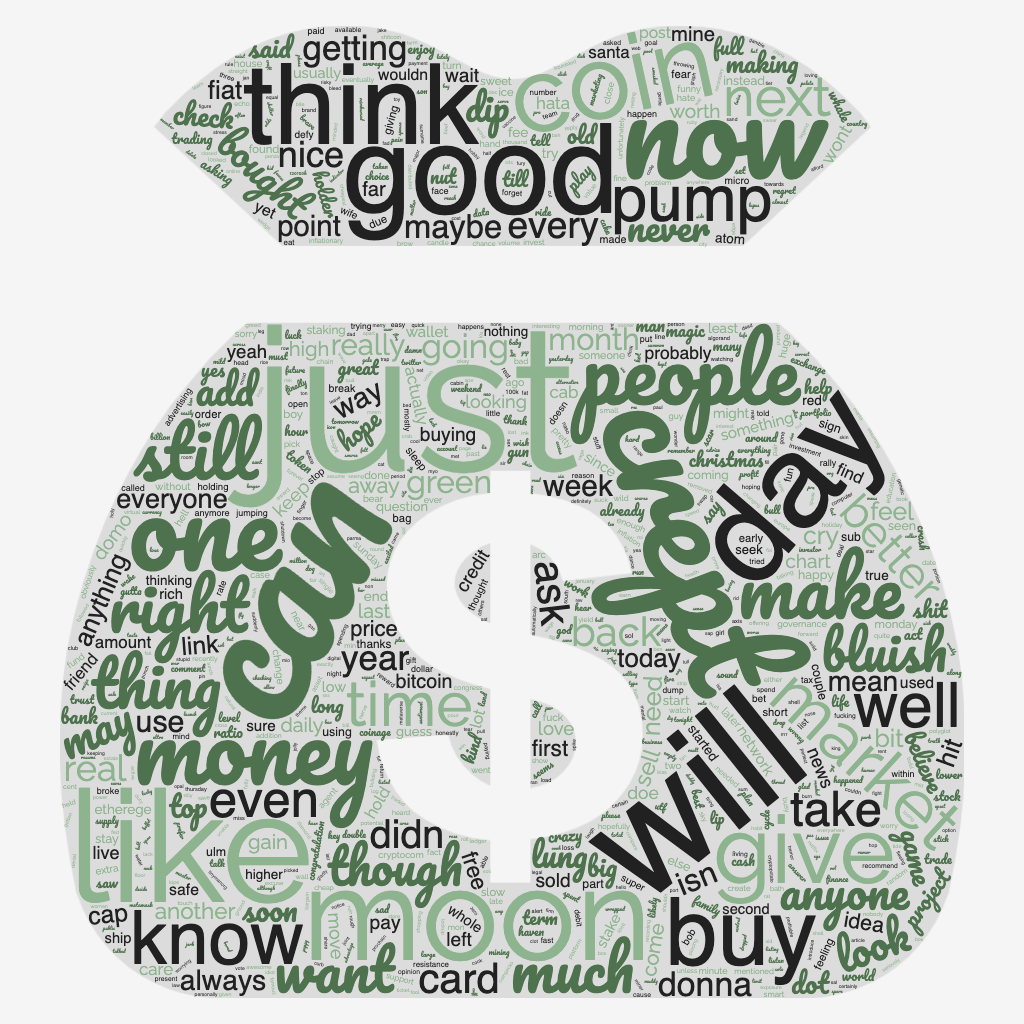